In [1]:
pip install numpy matplotlib Pillow scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2, fftshift, ifftshift


In [3]:
# Load the image and convert to grayscale
img = Image.open('COMEAU.jpg').convert('L')  # Change to your image path
img = np.array(img)


In [4]:
def compute_fourier_transform(image):
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)  # Shift the zero frequency component to the center
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Use log for better visualization
    return f_transform_shifted, magnitude_spectrum

f_transform_shifted, magnitude_spectrum = compute_fourier_transform(img)

In [5]:
def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    butter_filter = 1 / (1 + (distance / cutoff)**(2 * order))
    return butter_filter

In [6]:
def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    gaussian = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return gaussian

In [7]:
# Parameters for filters
cutoff_frequency = 30
filter_order = 2

# Create filters
butter_filter = butterworth_filter(img.shape, cutoff_frequency, filter_order)
gaussian_filter = gaussian_filter(img.shape, cutoff_frequency)

# Apply filters
butter_filtered = f_transform_shifted * butter_filter
gaussian_filtered = f_transform_shifted * gaussian_filter

# Compute the inverse Fourier Transform
butter_inverse = ifft2(ifftshift(butter_filtered)).real
gaussian_inverse = ifft2(ifftshift(gaussian_filtered)).real

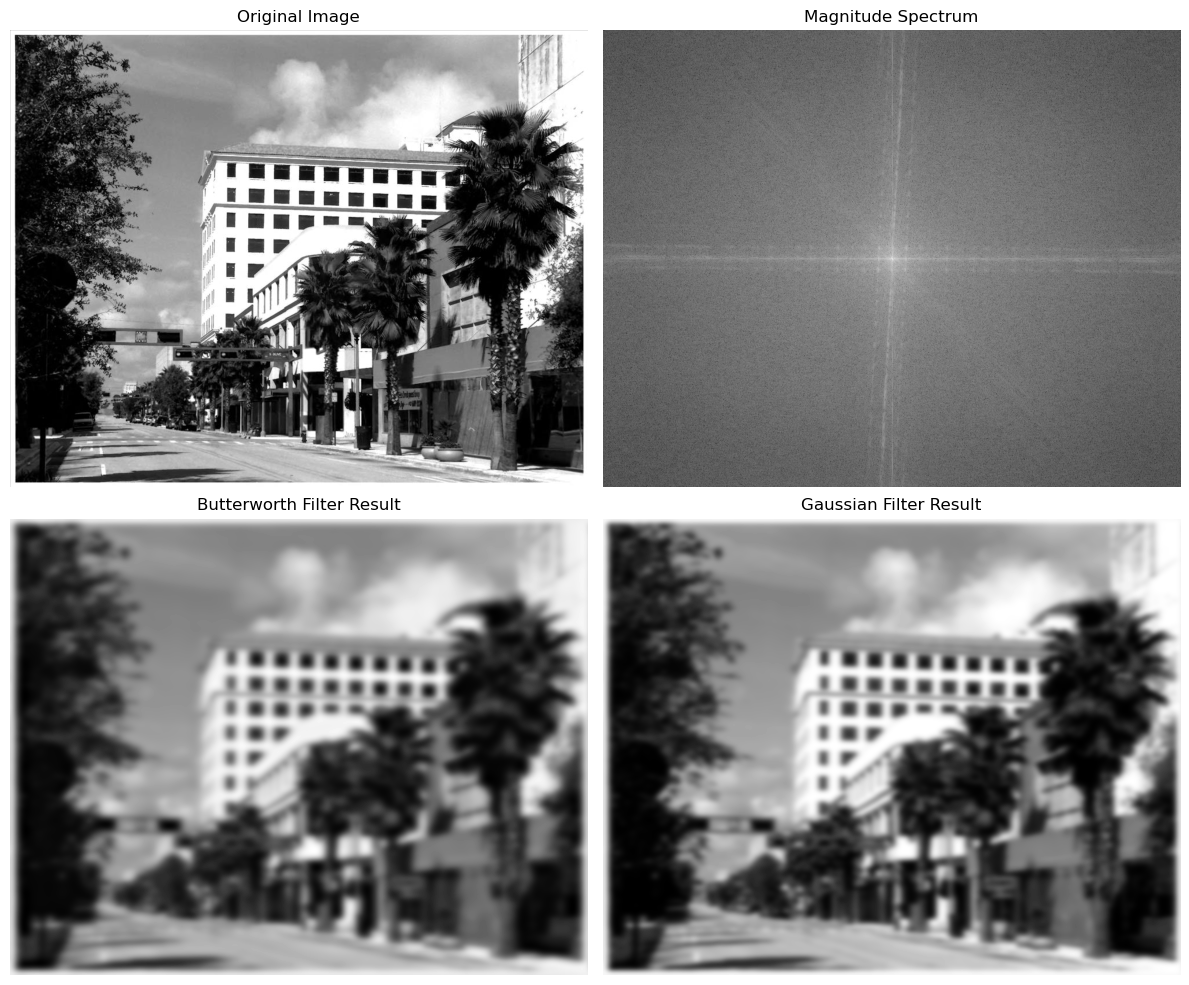

In [8]:
# Plotting results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Butterworth Filter Result')
plt.imshow(butter_inverse, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gaussian Filter Result')
plt.imshow(gaussian_inverse, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()